In [55]:
import pandas as pd
import seaborn as sns
true = pd.read_csv('data/True.csv')
fake = pd.read_csv('data/Fake.csv')
true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [56]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [57]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [58]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [59]:
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [60]:
true['label'] = 1
fake['label'] = 0
frames = [true.loc[:][:], fake.loc[:][:]]
df = pd.concat(frames)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [61]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<AxesSubplot: xlabel='label', ylabel='count'>

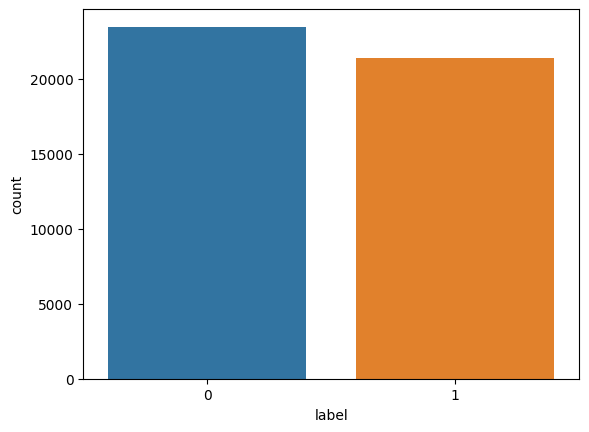

In [62]:


df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month


sns.countplot(data = df, x = 'label')

<AxesSubplot: xlabel='Year', ylabel='count'>

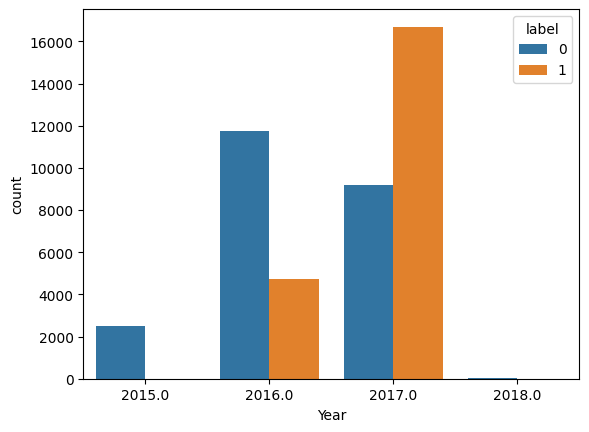

In [63]:

sns.countplot(data = df, x = "Year", hue = "label")

<AxesSubplot: xlabel='Month', ylabel='count'>

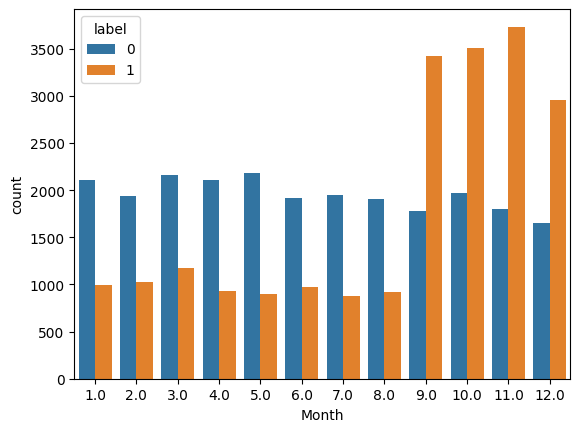

In [64]:

sns.countplot(data = df, x = "Month", hue="label")

In [65]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot: xlabel='Year', ylabel='count'>

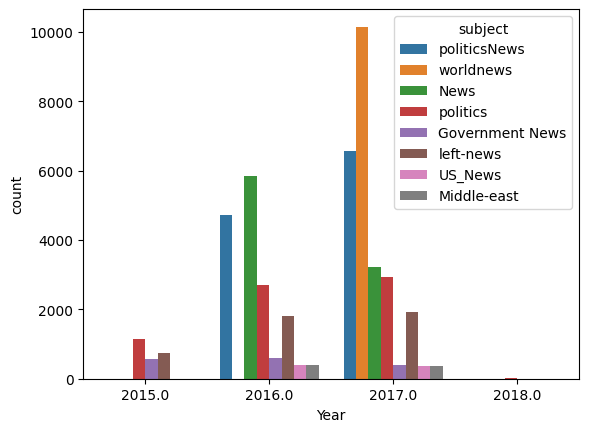

In [66]:

sns.countplot(data = df, x = "Year", hue="subject")
 


In [67]:
# Separate the value
# frames = [true.loc[:200][:], fake.loc[:200][:]]
frames = [true.head(200), fake.head(200)]
df = pd.concat(frames)
X = df.drop('label', axis = 1)
y = df['label']


df = df.dropna()
df2 = df.copy()
df2.reset_index(inplace = True)
# df2
# X
# df2
df2

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...,...
395,195,Nursing Textbooks Recalled And Apology Issued...,"Pearson, an educational publishing company, is...",News,"October 23, 2017",0
396,196,Trump SCREAMS On Twitter After Seeing A Poll ...,Rex Tillerson was right. Donald Trump is a f*c...,News,"October 22, 2017",0
397,197,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,"October 21, 2017",0
398,198,NRA Releases Fascist Ad Calling All Trump Cri...,The First Amendment of the United States Const...,News,"October 21, 2017",0


In [68]:
# Text processing 


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['washington reuter head conserv republican faction u congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican u repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas non defens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas non defens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say enough need give govern pay rais percent fiscal conserv see rational eventu run peopl money said meadow among republican vote late decemb parti 

In [69]:

from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
tfidf_v = TfidfVectorizer()
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# import numpy as np
# import itertools
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.950


Text(0.5, 1.0, 'Confusion Matrix')

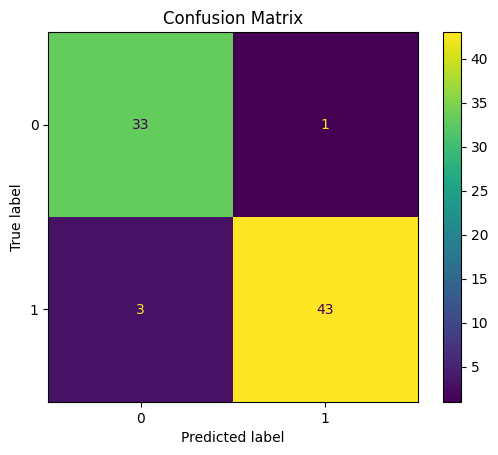

In [72]:

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")


In [73]:
# Tokenization
review = re.sub('[^a-zA-Z]', ' ', fake['text'][100])
review = review.lower()
review = review.split() 
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
val = tfidf_v.transform([review]).toarray()
classifier.predict(val)


array([0], dtype=int64)

In [74]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [75]:
# Load model and vectorizer
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
joblib_model.predict(val_pkl)

array([0], dtype=int64)

In [76]:
model = pickle.load(open('model2.pkl', 'rb'))
tfidfvect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [77]:
def predict(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    review_vect = tfidfvect.transform([review]).toarray()
    prediction = 'FAKE' if model.predict(review_vect) == 0 else 'REAL'
    return prediction

text = "Former CIA Openly Suggests He’s Like A Dictator"
prediction = predict(text)
print(prediction)

FAKE
